# Capstone Regression Project

## Business Understanding

This project analyzes the provided real estate data from King county, Washington to assist Zapco home contruction company to make data-driven decisions in building houses. Home building is about building quality houses with healthy profit margin and sustainable growth. Zapco wants to expand their business to include different models of home building to further grow as a leading home construction company.

## Business Problem

Zapco home contruction company can build quality and profitable homes based on the analysis provided. In order for Zapco to continue building homes with healthy profit and quality driven model, they need to find out where the market is in King county area. By analysing King county real estate data using linear regression model, my desire is to give Zapco general overview of the market in King county, WA.

## Data Understanding

The King county real estate data shows home prices in King county based on multiple variables. It contains such factors as square footage of the lot, square footage of living space, number of rooms, number of bathrooms, location of the house, etc. One certain thing I need to consider is what correlation each factor has on home price. A regression model will be set up based on these variables to better predict home prices.

## Data Preparation

First kc_house_data.csv file will loaded using pandas. Next data will be explored to see what columns are contained in the pandas table. 

### Loading the Data

All the necessary libraries like pandas, numpy, and matplotlib are imported. King county real estate data is in .csv file so using pandas reading function dataset is called in. I will call the read dataset kcdf variable. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
kcdf=pd.read_csv('./data/kc_house_data.csv')

### Data Exploration

Columns of kcdf will explored to see columns that are effecting the price. Using pandas info method to see if there are any Nan values that I need to take out or replace.

In [3]:
kcdf.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

In [4]:
kcdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

It seems like all the columns have same number of rows except heat_source and sewer_system columns. Data cleaning is needed for these columns. 

In [5]:
kcdf.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


{'whiskers': [<matplotlib.lines.Line2D at 0x7fa2351e2d00>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa2351803a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa2351e2910>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa235180ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa235180e50>],
 'means': []}

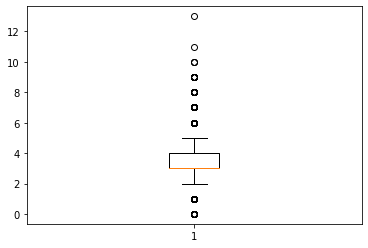

In [6]:
plt.boxplot(kcdf['bedrooms'])

Boxplot was used to visualize to see if there are a lot of outliers in the bedroom column. It looks like majority of rows of the column is between 2 and 6 bedrooms. 

In [7]:
kcdf.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


General overview of the data frame was done using pandas head() method. It looks like there are 25 columns of data that I need to look closely to see if there are unnecessary columns also to see if there are important columns in deciding housing prices. It looks like 'id' column has all these random numbers that has nothing to do with price. I will drop this column because it's not significant for this project

In [8]:
kcdf.drop(labels='id', axis=1, inplace=True)
kcdf.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [9]:
kcdf.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
greenbelt         object
nuisance          object
view              object
condition         object
grade             object
heat_source       object
sewer_system      object
sqft_above         int64
sqft_basement      int64
sqft_garage        int64
sqft_patio         int64
yr_built           int64
yr_renovated       int64
address           object
lat              float64
long             float64
dtype: object

At this point displaying data types is of importance this gives the information whether each column's data type is integer, float, string or something else. This is important because Python can only work with numerical data. I need to be aware which is numerical data and which is catagorical data. 

In [10]:
sdate = {'date':'selldate'}
kcdf.rename(columns=sdate, inplace=True)

To clarify things 'date' column is changed to 'selldate'. By changing this name we can see more clearly which date the house was sold. This is used to calculate how old each house is. 

In [11]:
kcdf.selldate = kcdf.selldate.apply(lambda x:pd.to_datetime(x, yearfirst=True))

Using Pandas' datetime method the format of the date is changed, putting year of the date first. Apply lambda function is used to iterate through all the rows of selldate. 

In [12]:
kcdf.dtypes

selldate         datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront               object
greenbelt                object
nuisance                 object
view                     object
condition                object
grade                    object
heat_source              object
sewer_system             object
sqft_above                int64
sqft_basement             int64
sqft_garage               int64
sqft_patio                int64
yr_built                  int64
yr_renovated              int64
address                  object
lat                     float64
long                    float64
dtype: object

We can see 'selldate' column has changed its data type from string object to datetime.

In [13]:
kcdf.head()

,selldate,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [14]:
kcdf['yr_old'] = np.where(kcdf['yr_renovated'] != 0, kcdf.selldate.apply(lambda x: x.year) - kcdf['yr_renovated'],
                          kcdf['selldate'].apply(lambda x: x.year) - kcdf['yr_built'])

Now we can calculate age of each house by using numpy's where function. If house is ever renovated then we can subtract 'yr renovated' column from 'selldate' column. If house is never renovated we just subtract 'yr_built' column from 'selldate' column. We saved this data in a new column called 'yr_old' which tells us the age of each house. 

In [15]:
kcdf.head()

,selldate,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,yr_old
0,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,53
1,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,71
2,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,65
3,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,11
4,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,9


In [16]:
kcdf.address[0:5]

0    2102 Southeast 21st Court, Renton, Washington ...
1    11231 Greenwood Avenue North, Seattle, Washing...
2    8504 South 113th Street, Seattle, Washington 9...
3    4079 Letitia Avenue South, Seattle, Washington...
4    2193 Northwest Talus Drive, Issaquah, Washingt...
Name: address, dtype: object

location of the property usually is very important factor impacting the price of a house. Therefore, 'address' column would play a crucial role in finding out where the house is located. 

In [17]:
kcdf.address[1000][-20:-15]

'98019'

Using Python index() method to see if first 1000 addresses have same format, it looks like first 1000 addresses and likely all the addresses in the 'address' column uses the same format. We are able to get the zipcode for the first 1000 houses. 

In [18]:
kcdf['zipcode'] = kcdf.address.apply(lambda x: x[-20:-15])

Again we used apply.lambda method to create 'zipcode' column. This column can be super useful in calculating if the house is close to any hospital or school. These factors could impact the price of a house. 

In [19]:
kcdf.head()

,selldate,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,yr_old,zipcode
0,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,53,98055
1,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,71,98133
2,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,65,98178
3,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,11,98118
4,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,9,98027


We see that 'zipcode' column has been created. 

### Data Cleaning

Now we need to engage in some data cleaning. It is always important to clean 'Nan' values so we start off with looking at data frame information to see if there are any missing values. If there are missing values we must either get rid of them or replace them with appropriate values.

In [20]:
kcdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   selldate       30155 non-null  datetime64[ns]
 1   price          30155 non-null  float64       
 2   bedrooms       30155 non-null  int64         
 3   bathrooms      30155 non-null  float64       
 4   sqft_living    30155 non-null  int64         
 5   sqft_lot       30155 non-null  int64         
 6   floors         30155 non-null  float64       
 7   waterfront     30155 non-null  object        
 8   greenbelt      30155 non-null  object        
 9   nuisance       30155 non-null  object        
 10  view           30155 non-null  object        
 11  condition      30155 non-null  object        
 12  grade          30155 non-null  object        
 13  heat_source    30123 non-null  object        
 14  sewer_system   30141 non-null  object        
 15  sqft_above     3015

It looks like there are some missing values in 'heat_source' and 'sewer_system' columns. Rest of the columns look to be sound in their non-null count.

In [21]:
kcdf.isna().sum()/kcdf.shape[0]

selldate         0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.000000
greenbelt        0.000000
nuisance         0.000000
view             0.000000
condition        0.000000
grade            0.000000
heat_source      0.001061
sewer_system     0.000464
sqft_above       0.000000
sqft_basement    0.000000
sqft_garage      0.000000
sqft_patio       0.000000
yr_built         0.000000
yr_renovated     0.000000
address          0.000000
lat              0.000000
long             0.000000
yr_old           0.000000
zipcode          0.000000
dtype: float64

Here we calculate the percentage of missing values in each column to see if we can safely remove missing data. If we inadvertently remove large set of data that will impact in a huge way how modeling is accurate. It looks to be reasonably safe to remove missing data from 'heat_source' and "sewer_system' columns because they are just minuscule of whole column.

In [22]:
kcdf.dropna(subset=['heat_source', 'sewer_system'], axis=0, inplace=True)

In [23]:
kcdf.isna().sum()/kcdf.shape[0]

selldate         0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
greenbelt        0.0
nuisance         0.0
view             0.0
condition        0.0
grade            0.0
heat_source      0.0
sewer_system     0.0
sqft_above       0.0
sqft_basement    0.0
sqft_garage      0.0
sqft_patio       0.0
yr_built         0.0
yr_renovated     0.0
address          0.0
lat              0.0
long             0.0
yr_old           0.0
zipcode          0.0
dtype: float64

After dropping null values we can see percentage of null value in 'heat_source' and 'sewer_system' is 0.0. It looks to be that number of rows in each column reduce to 30111 rows from 30155 rows, so about 44 rows were eliminated. 

In [24]:
kcdf.shape

(30111, 26)

In [25]:
kcdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   selldate       30111 non-null  datetime64[ns]
 1   price          30111 non-null  float64       
 2   bedrooms       30111 non-null  int64         
 3   bathrooms      30111 non-null  float64       
 4   sqft_living    30111 non-null  int64         
 5   sqft_lot       30111 non-null  int64         
 6   floors         30111 non-null  float64       
 7   waterfront     30111 non-null  object        
 8   greenbelt      30111 non-null  object        
 9   nuisance       30111 non-null  object        
 10  view           30111 non-null  object        
 11  condition      30111 non-null  object        
 12  grade          30111 non-null  object        
 13  heat_source    30111 non-null  object        
 14  sewer_system   30111 non-null  object        
 15  sqft_above     3011

<AxesSubplot:ylabel='Frequency'>

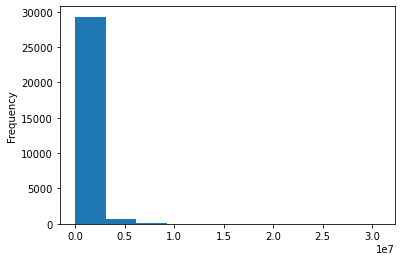

In [26]:
kcdf.price.plot(kind='hist')

<AxesSubplot:>

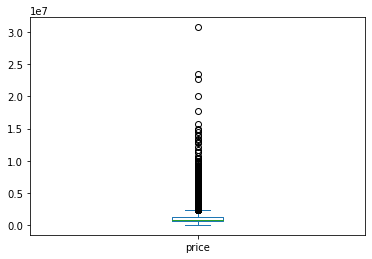

In [27]:
kcdf.price.plot(kind='box')

We want to look at our target variable 'price' column if there are any outliers. Histogram and Boxplot were used to investigte outliers. 5 million dollars would be appropriate cutoff point because below that mark is where majority of data resides. But we could try 10 million point or 15 million point to see if that improves our modeling. 

In [28]:
kcdf = kcdf[kcdf.price<=5000000]

## Modeling

Now we will work on our baseline modeling. By creating our baseline model we could see where we stand.

### Baseline Model

In [29]:
pred_cols = [x for x in kcdf.columns if x not in ['selldate', 'price', 'waterfront', 'greenbelt', 'nuisance', 'view',
                                                  'condition', 'grade', 'heat_source', 'sewer_system', 'address','zipcode','lat','long']]
pred_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'sqft_garage',
 'sqft_patio',
 'yr_built',
 'yr_renovated',
 'yr_old']

In [30]:
kcdf_nd = kcdf[[
   'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'sqft_garage',
 'sqft_patio',
 'yr_built',
 'yr_renovated',
 'yr_old'
]]
kcdf_nd

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,yr_old
0,4,1.0,1180,7140,1.0,1180,0,0,40,1969,0,53
1,5,2.5,2770,6703,1.0,1570,1570,0,240,1950,0,71
2,6,2.0,2880,6156,1.0,1580,1580,0,0,1956,0,65
3,3,3.0,2160,1400,2.0,1090,1070,200,270,2010,0,11
4,2,2.0,1120,758,2.0,1120,550,550,30,2012,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...
30150,5,2.0,1910,4000,1.5,1600,1130,0,210,1921,0,100
30151,3,2.0,2020,5800,2.0,2020,0,0,520,2011,0,10
30152,3,2.0,1620,3600,1.0,940,920,240,110,1995,0,27
30153,3,2.5,2570,2889,2.0,1830,740,480,100,2006,0,16


Having overview of the numerical columns to see where stand is important in deciding if more data cleaning is needed. The histrogram shows there are a lot of outliers that still need to be cleaned. 

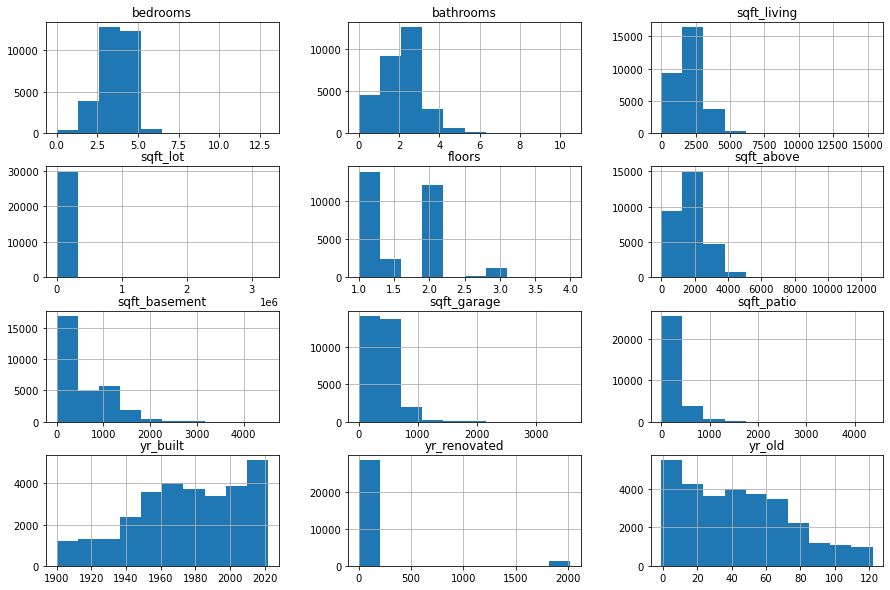

In [31]:
kcdf_nd.hist(figsize=(15,10));

 We wrote 'for loop' method to eliminate catagorical data from our baseline modeling. For our baseline model, just numerical columns were used.  

In [32]:
#importing appropriate library
import statsmodels.api as sm

In [33]:
preds = kcdf[pred_cols]
target = kcdf.price

In [34]:
y= target
x= preds

model = sm.OLS(y, sm.add_constant(x))
results = model.fit()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [35]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     2129.
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:01:15   Log-Likelihood:            -4.3391e+05
No. Observations:               29904   AIC:                         8.678e+05
Df Residuals:                   29891   BIC:                         8.680e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -5.88e+05   1.12e+06     -0.526      0.599   -2.78e+06     1.6e+06
bedrooms      -1.012e+05   3918.948    -25.814      0.000   -1.09e+05   -9.35e+04
bathrooms      1.123e+05   5760.854     19.494      0.000    1.01e+05    1.24e+05
sqft_living     290.3805     13.203     21.993      0.000     264.501     316.260
sqft_lot          0.0227      0.048      0.471      0.638      -0.072       0.117
floors         4.885e+04   6947.415      7.031      0.000    3.52e+04    6.25e+04
sqft_above      193.7428     13.477     14.375      0.000     167.326     220.159
sqft_basement   102.3342      9.868     10.370      0.000      82.992     121.676
sqft_garage     -47.7867     13.569     -3.522      0.000     -74.383     -21.191
sqft_patio      150.3023     12.891     11.659      0.000     125.035     175.570
yr_built        240.6566    553.673      0.435      0.664    -844.566    1325.880
yr_renovated    132.0286     17.570      7.514      0.000      97.590     166.467
yr_old         3488.2801    557.067      6.262      0.000    2396.404    4580.156
==============================================================================
Omnibus:                     9637.330   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63756.829
Skew:                           1.388   Prob(JB):                         0.00
Kurtosis:                       9.593   Cond. No.                     2.47e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The model overall is statistically significant. It shows there is about 46% of the variance in price. I hope to raise this percentage by adding more featured engineering to the data frame. 

The coefficients are all statistically significant except 'sqft_lot' and 'yr_built'. Also I find it strange that bedrooms and sqft_garage has negative numbers you would think as these increase the price will be up too. Plus price decrese is too high. This tells me there are large number of outliers.

- bedrooms: for each additional room of the house, the price decreases by about \\$101200
- bathrooms: for each additional room of the house, the price increases by about \\$112300
- sqft_living: for each additional square foot of lot area, the price increases by about \\$290
- floors: for each additional square foot of lot area, the price increases by about \\$.02
- sqft_above: for each additional square foot of lot area, the price increases by about \\$193
- sqft_basement: for each additional square foot of lot area, the price increases by about \\$102
- sqft_garage: for each additional room of the house, the price decreases by about \\$48
- sqft_patio: for each additional square foot of lot area, the price increases by about \\$150
- yr_renovated: for each additional square foot of lot area, the price increases by about \\$132
- yr_old: for each additional square foot of lot area, the price increases by about \\$3488

### Handling Outliers

We want to see if there are any changes to the model by eliminating some of the extreme outliers.

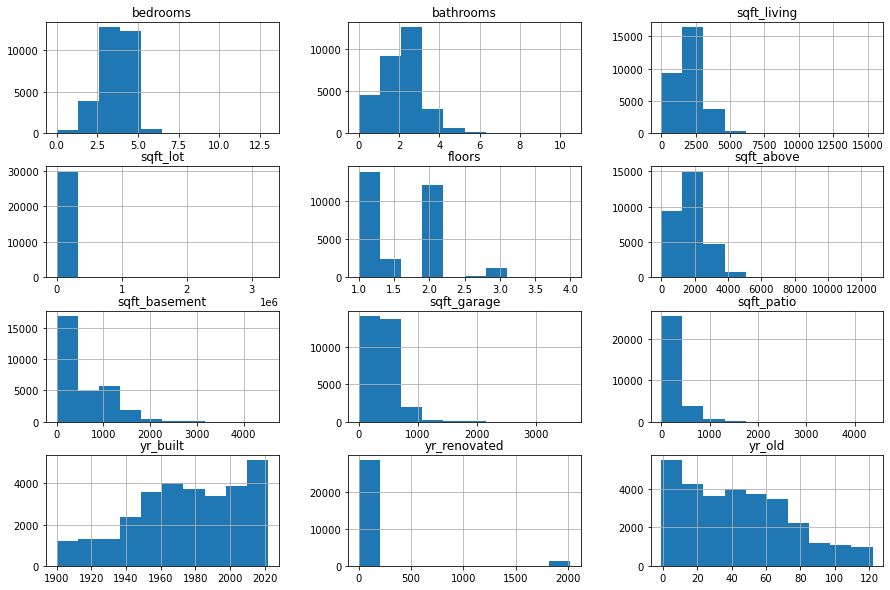

In [36]:
kcdf_nd.hist(figsize=(15,10));

Again looking at the whole picture of where numerical columns stand gives us better scope of where we need to eliminate outliers to more accurately build our prediction model.

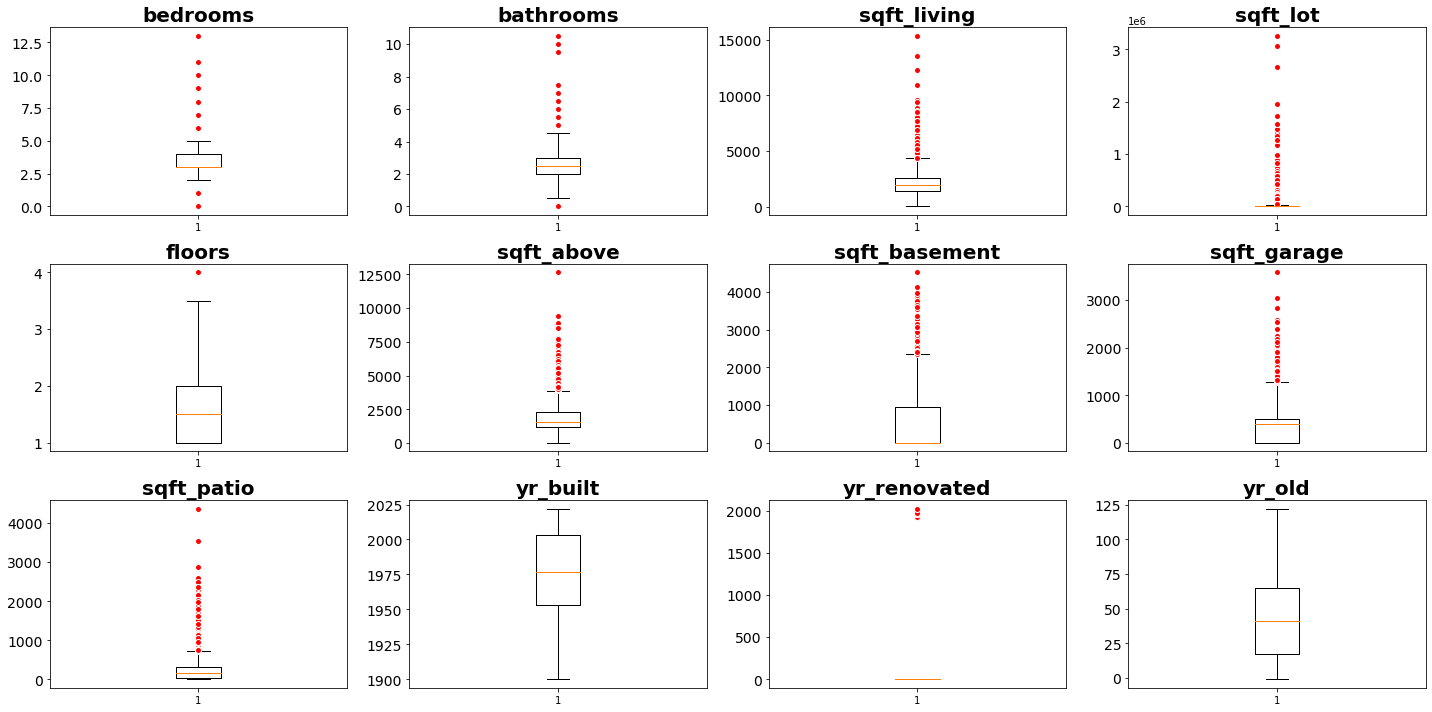

In [37]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(3, 4, figsize=(20,10))
for i, ax in enumerate(axs.flat):
    ax.boxplot(kcdf_nd.iloc[:,i], flierprops=red_circle)
    ax.set_title(kcdf_nd.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()    

We can also use boxplots to display more closely where the outliers are. It is important for us to eliminate 'right amount' of outliers because eliminating too much data can affect how the model turns out.  

Now we will eliminate the outliers in two or three columns to see if this will improve our model in any way. We will make a copy of kcdf data frame to use for this purpose. 

In [38]:
kcdf_cp = kcdf.copy()

In [39]:
kcdf_cp = kcdf_cp[kcdf_cp.bedrooms <= 6]

In [40]:
kcdf_cp = kcdf_cp[kcdf_cp.bathrooms <= 6]

In [41]:
kcdf_cp = kcdf_cp[kcdf_cp.sqft_patio <= 3000]

### Model Iteration

Now we will run the model again to see if eliminating outliers had any effect on the prediction model. 

In [42]:
pred_cols1 = [x for x in kcdf_cp.columns if x not in ['selldate', 'price', 'waterfront', 'greenbelt', 'nuisance', 'view',
                                                  'condition', 'grade', 'heat_source', 'sewer_system', 'address','zipcode','lat','long']]
pred_cols1

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'sqft_garage',
 'sqft_patio',
 'yr_built',
 'yr_renovated',
 'yr_old']

In [43]:
preds = kcdf_cp[pred_cols1]
target = kcdf_cp.price

In [44]:
y= target
x= preds

model = sm.OLS(y, sm.add_constant(x))
results = model.fit()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [45]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     2102.
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:01:19   Log-Likelihood:            -4.3159e+05
No. Observations:               29751   AIC:                         8.632e+05
Df Residuals:                   29738   BIC:                         8.633e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.574e+05   1.12e+06     -0.319      0.750   -2.55e+06    1.84e+06
bedrooms      -1.022e+05   4087.811    -25.005      0.000    -1.1e+05   -9.42e+04
bathrooms      1.163e+05   5864.328     19.829      0.000    1.05e+05    1.28e+05
sqft_living     295.2603     13.300     22.200      0.000     269.191     321.329
sqft_lot          0.0190      0.048      0.393      0.694      -0.076       0.114
floors         4.742e+04   6976.469      6.797      0.000    3.37e+04    6.11e+04
sqft_above      195.9737     13.538     14.476      0.000     169.439     222.508
sqft_basement   101.2097      9.875     10.249      0.000      81.853     120.566
sqft_garage     -49.5203     13.710     -3.612      0.000     -76.393     -22.648
sqft_patio      149.8629     13.029     11.502      0.000     124.325     175.400
yr_built        116.5802    554.408      0.210      0.833    -970.085    1203.245
yr_renovated    128.7952     17.575      7.328      0.000      94.347     163.243
yr_old         3471.0910    557.710      6.224      0.000    2377.954    4564.228
==============================================================================
Omnibus:                     9637.662   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            62180.771
Skew:                           1.404   Prob(JB):                         0.00
Kurtosis:                       9.502   Cond. No.                     2.47e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

It looks to be that our R-Squared number went down though it didn't go down significant amount. This points to that eliminating outliers from the processed columns didn't help us to come up with better R-Squared number. Plus, as it is stated in the notes above that the condition number is too high which tells us that there may be multicollinearity problems. 

### Dummifying the Categorical Data

In order for us to use categorical columns in the model we will use pandas' get_dummies method to numericalize the categorical data. First We will take a look at general set up of each categorical column's value arrangement then we will apply get_dummies method. One thing to clearly remember is that when dummifying our data it is important for us to drop first variable as it reduces the correlations created among dummy variables.

In [46]:
kcdf[['waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade', 'heat_source', 'sewer_system']].value_counts()

waterfront  greenbelt  nuisance  view       condition  grade         heat_source  sewer_system
NO          NO         NO        NONE       Average    8 Good        Gas          PUBLIC          3516
                                                       7 Average     Gas          PUBLIC          2533
                                            Good       7 Average     Gas          PUBLIC          1690
                                            Average    9 Better      Gas          PUBLIC          1551
                                            Good       8 Good        Gas          PUBLIC          1003
                                                                                                  ... 
                       YES       EXCELLENT  Good       10 Very Good  Electricity  PUBLIC             1
                                                                     Gas          PUBLIC             1
                                                       7 Average     Gas         

In [47]:
#dummifying categorical data
cat_columns = ['waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade', 'heat_source', 'sewer_system']
dummy_kcdf = pd.get_dummies(data=kcdf, columns=cat_columns, drop_first=True)

In [48]:
dummy_kcdf.columns

Index(['selldate', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio',
       'yr_built', 'yr_renovated', 'address', 'lat', 'long', 'yr_old',
       'zipcode', 'waterfront_YES', 'greenbelt_YES', 'nuisance_YES',
       'view_EXCELLENT', 'view_FAIR', 'view_GOOD', 'view_NONE',
       'condition_Fair', 'condition_Good', 'condition_Poor',
       'condition_Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_2 Substandard', 'grade_3 Poor',
       'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
       'grade_8 Good', 'grade_9 Better', 'heat_source_Electricity/Solar',
       'heat_source_Gas', 'heat_source_Gas/Solar', 'heat_source_Oil',
       'heat_source_Oil/Solar', 'heat_source_Other',
       'sewer_system_PRIVATE RESTRICTED', 'sewer_system_PUBLIC',
       'sewer_system_PUBLIC RESTRICTED'],
      dtype='object')

### Model Iteration

With the above processed data we will again attempt to iterate through the model to see if we can improve on R-Squared number. 

In [49]:
#see if data type has changed
dummy_kcdf.dtypes

selldate                           datetime64[ns]
price                                     float64
bedrooms                                    int64
bathrooms                                 float64
sqft_living                                 int64
sqft_lot                                    int64
floors                                    float64
sqft_above                                  int64
sqft_basement                               int64
sqft_garage                                 int64
sqft_patio                                  int64
yr_built                                    int64
yr_renovated                                int64
address                                    object
lat                                       float64
long                                      float64
yr_old                                      int64
zipcode                                    object
waterfront_YES                              uint8
greenbelt_YES                               uint8


In [50]:
x=dummy_kcdf.drop(labels = ['selldate', 'price', 'zipcode', 'address'], axis=1)
y=dummy_kcdf.price

first_dummy_model = sm.OLS(y, sm.add_constant(x))
results = first_dummy_model.fit()
results.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     868.6
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:01:21   Log-Likelihood:            -4.3064e+05
No. Observations:               29904   AIC:                         8.614e+05
Df Residuals:                   29858   BIC:                         8.617e+05
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            3.643e+05   1.01e+06      0.360      0.719   -1.62e+06    2.35e+06
bedrooms                        -3.252e+04   3683.870     -8.827      0.000   -3.97e+04   -2.53e+04
bathrooms                        8.242e+04   5278.448     15.615      0.000    7.21e+04    9.28e+04
sqft_living                       114.7871     12.191      9.415      0.000      90.892     138.683
sqft_lot                            0.3276      0.046      7.126      0.000       0.237       0.418
floors                          -3.094e+04   6611.623     -4.680      0.000   -4.39e+04    -1.8e+04
sqft_above                        141.9571     12.451     11.401      0.000     117.552     166.362
sqft_basement                      72.3910      9.192      7.875      0.000      54.374      90.408
sqft_garage                      -116.4845     12.652     -9.207      0.000    -141.282     -91.687
sqft_patio                         60.6552     11.963      5.070      0.000      37.207      84.103
yr_built                           19.3963    497.840      0.039      0.969    -956.392     995.184
yr_renovated                      136.9128     15.828      8.650      0.000     105.889     167.936
lat                               3.14e+04   2729.014     11.507      0.000    2.61e+04    3.68e+04
long                             7162.5300    686.102     10.439      0.000    5817.740    8507.320
yr_old                           3452.6877    503.761      6.854      0.000    2465.294    4440.081
waterfront_YES                   2.035e+05   2.46e+04      8.286      0.000    1.55e+05    2.52e+05
greenbelt_YES                     8.31e+04   1.61e+04      5.147      0.000    5.15e+04    1.15e+05
nuisance_YES                     3.189e+04   6787.562      4.698      0.000    1.86e+04    4.52e+04
view_EXCELLENT                   3.456e+05   2.46e+04     14.042      0.000    2.97e+05    3.94e+05
view_FAIR                        9.729e+04   3.16e+04      3.083      0.002    3.54e+04    1.59e+05
view_GOOD                         4.22e+04    1.8e+04      2.340      0.019    6859.032    7.75e+04
view_NONE                       -5.921e+04   1.08e+04     -5.486      0.000   -8.04e+04   -3.81e+04
condition_Fair                  -4.352e+04   2.96e+04     -1.470      0.142   -1.02e+05    1.45e+04
condition_Good                   3.691e+04   6470.923      5.703      0.000    2.42e+04    4.96e+04
condition_Poor                  -1.663e+05   5.86e+04     -2.837      0.005   -2.81e+05   -5.14e+04
condition_Very Good              9.589e+04   9161.157     10.467      0.000    7.79e+04    1.14e+05
grade_11 Excellent               3.654e+05   2.66e+04     13.753      0.000    3.13e+05    4.17e+05
grade_12 Luxury                  5.393e+05   4.98e+04     10.833      0.000    4.42

Clearly dummifying the categorical columns helped us to improve our R-Squared number. It shows that the model overall is still statistically significant but, the exceptions do exist in certain number of columns. It shows there is about 57% of the variance in price. Again I hope to raise this percentage by adding more featured engineering to the data frame. 

The coefficients are all statistically significant except 'yr_built' and several others. Still the condition number is too high as it is noted above. 

- bedrooms: for each additional room of the house, the price decreases by about \\$32520
- bathrooms: for each additional room of the house, the price increases by about \\$82420
- sqft_living: for each additional square foot of lot area, the price increases by about \\$114
- floors: for each additional square foot of lot area, the price dicreases by about \\$30940
- sqft_above: for each additional square foot of lot area, the price increases by about \\$142
- sqft_basement: for each additional square foot of lot area, the price increases by about \\$72
- sqft_garage: for each additional room of the house, the price decreases by about \\$116
- sqft_patio: for each additional square foot of lot area, the price increases by about \\$61
- yr_renovated: for each additional square foot of lot area, the price increases by about \\$137
- yr_old: for each additional square foot of lot area, the price increases by about \\$3453

### Handling Outliers

In an attempt to improve the model we will do outlier elimination on two columns(sqft_lot, sqft_living). Again we will use a copy of kcdf data frame to safe guard original kcdf data frame. 

In [51]:
kcdf_cp.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,yr_old
count,2.975100e+04,29751.000000,29751.000000,29751.000000,2.975100e+04,29751.000000,29751.000000,29751.000000,29751.00000,29751.000000,29751.000000,29751.000000,29751.000000,29751.000000,29751.000000
mean,1.060396e+06,3.389466,2.311116,2083.773184,1.646525e+04,1.540015,1788.662633,467.790057,328.21159,213.822897,1975.102249,88.666364,47.326759,-121.316930,43.656953
std,6.565761e+05,0.932589,0.844852,911.262407,5.960252e+04,0.567083,837.921463,563.228868,281.00391,237.286474,32.006208,411.522611,1.432045,5.728532,31.276950
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.00000,0.000000,1900.000000,0.000000,21.274240,-157.791480,-1.000000
25%,6.450000e+05,3.000000,2.000000,1410.000000,4.824500e+03,1.000000,1180.000000,0.000000,0.00000,40.000000,1953.000000,0.000000,47.402805,-122.326460,17.000000
50%,8.550000e+05,3.000000,2.500000,1910.000000,7.441000e+03,1.500000,1550.000000,0.000000,400.00000,150.000000,1977.000000,0.000000,47.550115,-122.225670,41.000000
75%,1.295000e+06,4.000000,3.000000,2590.000000,1.048350e+04,2.000000,2250.000000,940.000000,510.00000,310.000000,2003.000000,0.000000,47.670380,-122.115727,65.000000
max,5.000000e+06,6.000000,6.000000,9440.000000,3.253932e+06,4.000000,9440.000000,4000.000000,3050.00000,2880.000000,2022.000000,2022.000000,64.824070,-70.074340,122.000000


Text(0, 0.5, 'PRICE(MILLIONS)')

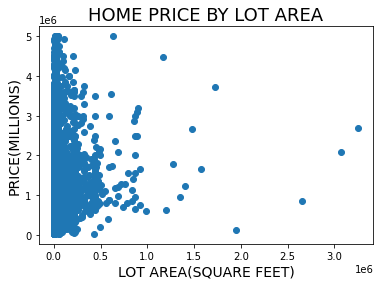

In [52]:
plt.scatter(kcdf_cp.sqft_lot, kcdf_cp.price)
plt.title('HOME PRICE BY LOT AREA', fontsize=18)
plt.xlabel("LOT AREA(SQUARE FEET)", fontsize=14)
plt.ylabel("PRICE(MILLIONS)", fontsize=14)

In [53]:
kcdf_cp = kcdf_cp[kcdf_cp.sqft_lot <= 20000000 ]

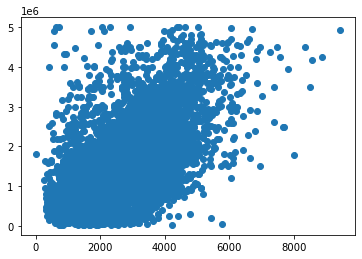

In [54]:
plt.scatter(kcdf_cp.sqft_living, kcdf_cp.price)
# plt.title('HOME PRICE BY LIVING SPACES', fontsize=18)
# plt.xlabel("LIVING SPACE(SQUARE FEET)", fontsize=14)
# plt.ylabel("PRICE(MILLIONS)", fontsize=14)

In [55]:
kcdf_cp = kcdf_cp[kcdf_cp.sqft_living <= 10000]

In [56]:
len(kcdf_cp[kcdf_cp.sqft_living <= 10000])

29751

### Model Iteration

In [57]:
cat_columns = ['waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade', 'heat_source', 'sewer_system']
dummy_kcdf_cp = pd.get_dummies(data=kcdf_cp, columns=cat_columns, drop_first=True)

In [58]:
x=dummy_kcdf_cp.drop(labels = ['selldate', 'price', 'zipcode', 'address'], axis=1)
y=dummy_kcdf_cp.price

first_dummy_model = sm.OLS(y, sm.add_constant(x))
results = first_dummy_model.fit()
results.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     855.2
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:01:22   Log-Likelihood:            -4.2836e+05
No. Observations:               29751   AIC:                         8.568e+05
Df Residuals:                   29705   BIC:                         8.572e+05
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            4.958e+05   1.02e+06      0.488      0.625   -1.49e+06    2.49e+06
bedrooms                        -3.328e+04   3841.035     -8.665      0.000   -4.08e+04   -2.58e+04
bathrooms                        8.573e+04   5382.285     15.929      0.000    7.52e+04    9.63e+04
sqft_living                       119.6651     12.297      9.731      0.000      95.563     143.767
sqft_lot                            0.3129      0.046      6.794      0.000       0.223       0.403
floors                          -3.174e+04   6642.849     -4.779      0.000   -4.48e+04   -1.87e+04
sqft_above                        143.6868     12.533     11.465      0.000     119.122     168.252
sqft_basement                      71.4836      9.214      7.758      0.000      53.424      89.543
sqft_garage                      -118.5901     12.800     -9.265      0.000    -143.678     -93.502
sqft_patio                         57.3591     12.116      4.734      0.000      33.612      81.106
yr_built                          -40.7426    499.137     -0.082      0.935   -1019.073     937.588
yr_renovated                      135.5094     15.852      8.549      0.000     104.439     166.579
lat                              3.103e+04   2723.045     11.397      0.000    2.57e+04    3.64e+04
long                             7291.4826    685.208     10.641      0.000    5948.444    8634.521
yr_old                           3456.7686    504.911      6.846      0.000    2467.122    4446.416
waterfront_YES                   1.981e+05   2.47e+04      8.029      0.000     1.5e+05    2.46e+05
greenbelt_YES                    8.035e+04   1.62e+04      4.971      0.000    4.87e+04    1.12e+05
nuisance_YES                     3.228e+04   6800.398      4.747      0.000     1.9e+04    4.56e+04
view_EXCELLENT                   3.589e+05   2.47e+04     14.517      0.000     3.1e+05    4.07e+05
view_FAIR                        9.124e+04   3.17e+04      2.878      0.004    2.91e+04    1.53e+05
view_GOOD                        3.576e+04   1.81e+04      1.980      0.048     365.716    7.12e+04
view_NONE                       -5.819e+04   1.08e+04     -5.385      0.000   -7.94e+04    -3.7e+04
condition_Fair                  -4.455e+04   2.95e+04     -1.508      0.132   -1.02e+05    1.34e+04
condition_Good                   3.575e+04   6474.812      5.521      0.000    2.31e+04    4.84e+04
condition_Poor                  -1.668e+05   5.85e+04     -2.853      0.004   -2.81e+05   -5.22e+04
condition_Very Good              9.407e+04   9171.594     10.257      0.000    7.61e+04    1.12e+05
grade_11 Excellent               3.657e+05   2.67e+04     13.677      0.000    3.13e+05    4.18e+05
grade_12 Luxury                  5.915e+05   5.12e+04     11.554      0.000    4.91

As we can see virtually there is no change to our R-Squared number. This could mean eliminating outliers in the processed columns do not have significant impact to our model. It also could mean there is too much collinearity taking place they have no bearing on the model. Plus, the condition number is still high.

### Web Scrapping to Feature Engineering

It is known that location of a property is very important is deciding the price of that property. Generally properties in affluent areas tend to be more expensive than those area where income levels are low. By web scrapping, using 'BeautifulSoup', we will look for all the city namesin King county from the site 'https://washington.hometownlocator.com/zip-codes/countyzips,scfips,53033,c,king.cfm'. Then we will create the city column in our kcdf dataframe. This will give us those cities which are King county only and in turn it will provide us with where property is located and general sense of that city's property value. 

In [59]:
from bs4 import BeautifulSoup
import requests

In [60]:
resp = requests.get('https://washington.hometownlocator.com/zip-codes/countyzips,scfips,53033,c,king.cfm')
resp.status_code

200

In [61]:
soup = BeautifulSoup(resp.content)
soup

<!DOCTYPE html>
<html><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<script data-cfasync="false" data-ezscrex="false" data-pagespeed-no-defer="">var __ez=__ez||{};__ez.stms=Date.now();__ez.evt={};__ez.script={};__ez.ck=__ez.ck||{};__ez.template={};__ez.template.isOrig=true;__ez.queue=function(){var e=0,i=0,t=[],n=!1,s=[],r=[],o=!0,a=function(e,i,n,s,r,o,a){var l=this;this.name=e,this.funcName=i,this.parameters=null===n?null:n instanceof Array?n:[n],this.isBlock=s,this.blockedBy=r,this.deleteWhenComplete=o,this.isError=!1,this.isComplete=!1,this.isInitialized=!1,this.proceedIfError=a,this.isTimeDelay=!1,this.process=function(){u("... func = "+e),l.isInitialized=!0,l.isComplete=!0,u("... func.apply: "+e);var i=l.funcName.split("."),n=null;i.length>3||(n=3===i.length?window[i[0]][i[1]][i[2]]:2===i.length?window[i[0]][i[1]]:window[l.funcName]),null!=n&&n.apply(null,this.parameters),!0===l.deleteWhenComplete&&delete t[e],!0===l.isBlock&&(u("----- F'D: "+l.name),

In [62]:
a_tags = soup.find('div', class_='bodycontainer').find_all('a')

In [63]:
city_names = [a.text for a in a_tags[-57:-25]]

In [64]:
len(city_names)

32

In [65]:
kcdf['address'].iloc[0].split(', ')[1]

'Renton'

In [66]:
kcdf['city'] = kcdf['address'].apply(lambda x: x.split(', ')[1])

In [67]:
kcdf['city'].nunique()

323

In [68]:
kcdf = kcdf.loc[kcdf['city'].isin(city_names)]
kcdf.head()

,selldate,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,yr_old,zipcode,city
0,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,53,98055,Renton
1,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,71,98133,Seattle
2,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,65,98178,Seattle
3,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,11,98118,Seattle
4,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,9,98027,Issaquah


We want to look at where the top ten most expensive cities are in King county. This will give us a picture as to where we want to build houses if we are to enter into luxury home market. 

Text(0, 0.5, 'CITY')

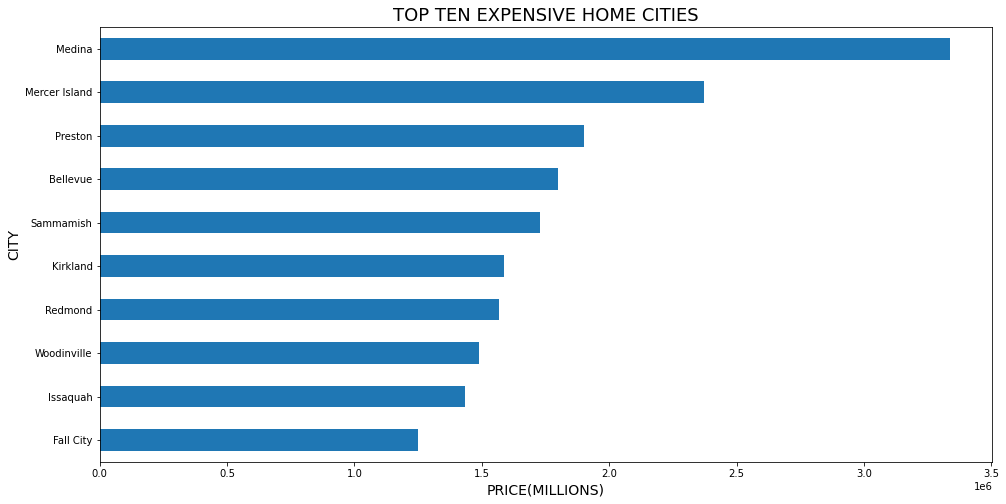

In [69]:
kcdf_city = kcdf.groupby(['city'])['price'].mean().sort_values(ascending=True)[20:30]
kcdf_city.plot(kind='barh', figsize=(16, 8))
plt.title('TOP TEN EXPENSIVE HOME CITIES', fontsize=18)
plt.xlabel("PRICE(MILLIONS)", fontsize=14)
plt.ylabel("CITY", fontsize=14)

In [70]:
kcdf['city']

0          Renton
1         Seattle
2         Seattle
3         Seattle
4        Issaquah
           ...   
30149     Seattle
30150     Seattle
30151     Seattle
30152     Seattle
30153      Renton
Name: city, Length: 25586, dtype: object

### Final Model

In [71]:
cat_columns = ['waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade', 'heat_source', 'sewer_system', 'city']
dummy_kcdf = pd.get_dummies(data=kcdf, columns=cat_columns, drop_first=True)

In [72]:
dummy_kcdf.head()

,selldate,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,...,city_Preston,city_Ravensdale,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Skykomish,city_Snoqualmie,city_Vashon,city_Woodinville
0,2022-05-24,675000.0,4,1.0,1180,7140,1.0,1180,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2021-12-13,920000.0,5,2.5,2770,6703,1.0,1570,1570,0,...,0,0,0,0,0,1,0,0,0,0
2,2021-09-29,311000.0,6,2.0,2880,6156,1.0,1580,1580,0,...,0,0,0,0,0,1,0,0,0,0
3,2021-12-14,775000.0,3,3.0,2160,1400,2.0,1090,1070,200,...,0,0,0,0,0,1,0,0,0,0
4,2021-08-24,592500.0,2,2.0,1120,758,2.0,1120,550,550,...,0,0,0,0,0,0,0,0,0,0


In [73]:
x=dummy_kcdf.drop(labels = ['selldate', 'price', 'zipcode', 'address'], axis=1)
y=dummy_kcdf.price

first_dummy_model = sm.OLS(y, sm.add_constant(x))
results = first_dummy_model.fit()
results.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     850.9
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:01:25   Log-Likelihood:            -3.6366e+05
No. Observations:               25586   AIC:                         7.275e+05
Df Residuals:                   25511   BIC:                         7.281e+05
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             -8.6e+06   1.08e+06     -7.975      0.000   -1.07e+07   -6.49e+06
bedrooms                        -1.467e+04   3298.666     -4.448      0.000   -2.11e+04   -8207.054
bathrooms                        5.847e+04   4749.581     12.311      0.000    4.92e+04    6.78e+04
sqft_living                       100.4681     10.841      9.268      0.000      79.220     121.717
sqft_lot                            0.4561      0.039     11.675      0.000       0.380       0.533
floors                          -1.813e+04   6261.983     -2.896      0.004   -3.04e+04   -5858.915
sqft_above                        182.4294     11.078     16.468      0.000     160.716     204.143
sqft_basement                      57.6384      8.304      6.941      0.000      41.363      73.914
sqft_garage                       -47.1333     11.848     -3.978      0.000     -70.356     -23.911
sqft_patio                         27.0233     10.643      2.539      0.011       6.163      47.883
yr_built                         -768.6679    436.959     -1.759      0.079   -1625.133      87.798
yr_renovated                       67.5837     14.112      4.789      0.000      39.923      95.245
lat                              4.556e+05   3.09e+04     14.767      0.000    3.95e+05    5.16e+05
long                             8.947e+04   7683.767     11.644      0.000    7.44e+04    1.05e+05
yr_old                            650.0676    441.643      1.472      0.141    -215.579    1515.714
waterfront_YES                   2.534e+05   2.17e+04     11.697      0.000    2.11e+05    2.96e+05
greenbelt_YES                    6513.9756   1.43e+04      0.455      0.649   -2.16e+04    3.46e+04
nuisance_YES                    -2.914e+04   6219.206     -4.686      0.000   -4.13e+04    -1.7e+04
view_EXCELLENT                   4.046e+05   2.19e+04     18.514      0.000    3.62e+05    4.47e+05
view_FAIR                         6.67e+04   2.86e+04      2.330      0.020    1.06e+04    1.23e+05
view_GOOD                        9.159e+04   1.59e+04      5.751      0.000    6.04e+04    1.23e+05
view_NONE                       -8.423e+04   9586.501     -8.787      0.000   -1.03e+05   -6.54e+04
condition_Fair                  -6.589e+04   2.66e+04     -2.477      0.013   -1.18e+05   -1.38e+04
condition_Good                   5.773e+04   5845.553      9.876      0.000    4.63e+04    6.92e+04
condition_Poor                  -1.193e+05   5.21e+04     -2.289      0.022   -2.21e+05   -1.71e+04
condition_Very Good              1.161e+05   8255.735     14.068      0.000       1e+05    1.32e+05
grade_11 Excellent               3.173e+05   2.31e+04     13.723      0.000    2.72e+05    3.63e+05
grade_12 Luxury                  4.226e+05   4.27e+04      9.897      0.000    3.39

### Regression Results

The regression results show that there is about 71% of the variance in price. Again in the future I hope to raise this percentage by adding more featured engineering to the data frame but, for this project this is the final model we will settle with.  

The coefficients are all statistically significant except 'yr_built' and several others. Still the condition number is too high for us to be comfortable with accuracy of these findings. General overview of the model shows us following: 

- bedrooms: for each additional room of the house, the price decreases by about \\$14670
- bathrooms: for each additional room of the house, the price increases by about \\$58470
- sqft_living: for each additional square foot of living area, the price increases by about \\$100
- sqft_lot: for each additional square foot of lot area, the price increases by about\\$.46
- floors: for each additional square foot of lot area, the price dicreases by about \\$18130
- sqft_above: for each additional square foot of lot area, the price increases by about \\$182
- sqft_basement: for each additional square foot of lot area, the price increases by about \\$57
- sqft_garage: for each additional room of the house, the price decreases by about \\$47
- sqft_patio: for each additional square foot of lot area, the price increases by about \\$27
- yr_renovated: for each additional square foot of lot area, the price increases by about \\$68
- yr_old: for each additional square foot of lot area, the price increases by about \\$650



### Center Data to Provide an Interpretable Intercept

Now we will center the data to find out what is the average selling price of homes in all the cities in King county.

In [74]:
kcdf_nd = dummy_kcdf.drop(labels = ['selldate', 'price', 'zipcode', 'address'], axis=1)
kcdf_centered = kcdf_nd

for col in kcdf_centered.columns:
    kcdf_centered[col] = kcdf_centered[col] - kcdf_centered[col].mean()

kcdf_centered

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,...,city_Preston,city_Ravensdale,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Skykomish,city_Snoqualmie,city_Vashon,city_Woodinville
0,0.567732,-1.345072,-951.721957,-10599.573478,-0.543168,-652.1348,-476.282107,-337.339991,-177.00043,-5.513289,...,-0.000156,-0.00258,-0.038459,0.924138,-0.038029,-0.364887,-0.000625,-0.011373,-0.007426,-0.022747
1,1.567732,0.154928,638.278043,-11036.573478,-0.543168,-262.1348,1093.717893,-337.339991,22.99957,-24.513289,...,-0.000156,-0.00258,-0.038459,-0.075862,-0.038029,0.635113,-0.000625,-0.011373,-0.007426,-0.022747
2,2.567732,-0.345072,748.278043,-11583.573478,-0.543168,-252.1348,1103.717893,-337.339991,-217.00043,-18.513289,...,-0.000156,-0.00258,-0.038459,-0.075862,-0.038029,0.635113,-0.000625,-0.011373,-0.007426,-0.022747
3,-0.432268,0.654928,28.278043,-16339.573478,0.456832,-742.1348,593.717893,-137.339991,52.99957,35.486711,...,-0.000156,-0.00258,-0.038459,-0.075862,-0.038029,0.635113,-0.000625,-0.011373,-0.007426,-0.022747
4,-1.432268,-0.345072,-1011.721957,-16981.573478,0.456832,-712.1348,73.717893,212.660009,-187.00043,37.486711,...,-0.000156,-0.00258,-0.038459,-0.075862,-0.038029,-0.364887,-0.000625,-0.011373,-0.007426,-0.022747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30149,-0.432268,0.154928,-861.721957,-16598.573478,0.456832,-782.1348,-56.282107,-137.339991,-157.00043,32.486711,...,-0.000156,-0.00258,-0.038459,-0.075862,-0.038029,0.635113,-0.000625,-0.011373,-0.007426,-0.022747
30150,1.567732,-0.345072,-221.721957,-13739.573478,-0.043168,-232.1348,653.717893,-337.339991,-7.00043,-53.513289,...,-0.000156,-0.00258,-0.038459,-0.075862,-0.038029,0.635113,-0.000625,-0.011373,-0.007426,-0.022747
30151,-0.432268,-0.345072,-111.721957,-11939.573478,0.456832,187.8652,-476.282107,-337.339991,302.99957,36.486711,...,-0.000156,-0.00258,-0.038459,-0.075862,-0.038029,0.635113,-0.000625,-0.011373,-0.007426,-0.022747
30152,-0.432268,-0.345072,-511.721957,-14139.573478,-0.543168,-892.1348,443.717893,-97.339991,-107.00043,20.486711,...,-0.000156,-0.00258,-0.038459,-0.075862,-0.038029,0.635113,-0.000625,-0.011373,-0.007426,-0.022747


In [75]:
kcdf_centered_model = sm.OLS(y, sm.add_constant(kcdf_centered))
centered_results = kcdf_centered_model.fit()

centered_results.params["const"]

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


1099229.3077855075

The new intercept is about \\$1.1m. This means that a home with average bedrooms, average bathrooms, average lot area, average living area, etc. would sell for about \\$1.1m.

### Standardization to identify the "Most Important" Feature

Now we will standardize the kcdf_centered data frame to identify most impactful feature of the data frame. 

In [76]:
kcdf_standardized = kcdf_centered.copy()

for col in kcdf_standardized.columns:
    kcdf_standardized[col] = kcdf_standardized[col] / kcdf_standardized[col].std()

kcdf_standardized

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,...,city_Preston,city_Ravensdale,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Skykomish,city_Snoqualmie,city_Vashon,city_Woodinville
0,0.583450,-1.555300,-1.014182,-0.164763,-0.977488,-0.756942,-0.837161,-1.184467,-0.726547,-0.170374,...,-0.012504,-0.050854,-0.199988,3.490185,-0.198823,-0.757958,-0.025014,-0.107256,-0.086494,-0.152563
1,1.611134,0.179143,0.680167,-0.171556,-0.977488,-0.304263,1.922428,-1.184467,0.094408,-0.757522,...,-0.012504,-0.050854,-0.199988,-0.286507,-0.198823,1.319282,-0.025014,-0.107256,-0.086494,-0.152563
2,2.638818,-0.399005,0.797386,-0.180059,-0.977488,-0.292656,1.940005,-1.184467,-0.890738,-0.572107,...,-0.012504,-0.050854,-0.199988,-0.286507,-0.198823,1.319282,-0.025014,-0.107256,-0.086494,-0.152563
3,-0.444235,0.757291,0.030134,-0.253987,0.822117,-0.861406,1.043578,-0.482228,0.217551,1.096628,...,-0.012504,-0.050854,-0.199988,-0.286507,-0.198823,1.319282,-0.025014,-0.107256,-0.086494,-0.152563
4,-1.471919,-0.399005,-1.078120,-0.263967,0.822117,-0.826585,0.129574,0.746691,-0.767595,1.158433,...,-0.012504,-0.050854,-0.199988,-0.286507,-0.198823,-0.757958,-0.025014,-0.107256,-0.086494,-0.152563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30149,-0.444235,0.179143,-0.918275,-0.258013,0.822117,-0.907835,-0.098927,-0.482228,-0.644452,1.003921,...,-0.012504,-0.050854,-0.199988,-0.286507,-0.198823,1.319282,-0.025014,-0.107256,-0.086494,-0.152563
30150,1.611134,-0.399005,-0.236273,-0.213572,-0.077686,-0.269442,1.149040,-1.184467,-0.028735,-1.653694,...,-0.012504,-0.050854,-0.199988,-0.286507,-0.198823,1.319282,-0.025014,-0.107256,-0.086494,-0.152563
30151,-0.444235,-0.399005,-0.119054,-0.185592,0.822117,0.218058,-0.837161,-1.184467,1.243745,1.127531,...,-0.012504,-0.050854,-0.199988,-0.286507,-0.198823,1.319282,-0.025014,-0.107256,-0.086494,-0.152563
30152,-0.444235,-0.399005,-0.545305,-0.219790,-0.977488,-1.035513,0.779923,-0.341780,-0.439213,0.633091,...,-0.012504,-0.050854,-0.199988,-0.286507,-0.198823,1.319282,-0.025014,-0.107256,-0.086494,-0.152563


In [77]:
standardized_model = sm.OLS(y, sm.add_constant(kcdf_standardized))
standardized_results = standardized_model.fit()
standardized_results.params

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const               1.099229e+06
bedrooms           -1.427737e+04
bathrooms           5.056858e+04
sqft_living         9.428061e+04
sqft_lot            2.934211e+04
                        ...     
city_Seattle        1.632095e+05
city_Skykomish     -7.348883e+03
city_Snoqualmie     2.340982e+04
city_Vashon         1.704889e+04
city_Woodinville    4.790016e+04
Length: 75, dtype: float64

We will convert pandas series to pandas data frame for an easier scanning of the data. 

In [78]:
stand_results = (standardized_results.params)
stand_results = stand_results.to_frame()
stand_results.columns = ['coefficients']
pd.set_option('display.max_rows', None)
stand_results

,coefficients
const,1.099229e+06
bedrooms,-1.427737e+04
bathrooms,5.056858e+04
sqft_living,9.428061e+04
sqft_lot,2.934211e+04
floors,-1.007597e+04
sqft_above,1.571700e+05
sqft_basement,3.279192e+04
sqft_garage,-1.342370e+04
sqft_patio,6.583368e+03


The feature with one of the highest standardized coefficients is 'lat' and 'long'. This is understandable because when I had 'city' feature added, R-Squared number shot up. Generally we are aware that the location of the property has big impact on the home price so, this result in a tentative manner makes sense. The other coefficient that stand out is 'sqft_living'. This also makes sense in that more living spaces the property has more expensive it will be. 

## Conclusion

General understanding is that affluent areas tend to have expensive home prices and less affluent areas have lower home prices. So people say the location of the property is very important. By engaging in the linear regression modeling for the King county real estate data we could reasonably conclude that indeed the location of the property makes gigantic difference in setting home prices.

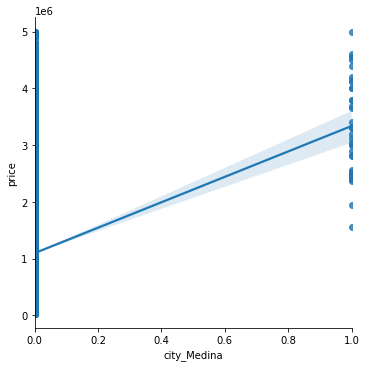

In [79]:
import seaborn as sns

sns.lmplot(x='city_Medina', y='price', data=dummy_kcdf)

It's not surprising to find that the city of Medina, which is most expensive city in King county, the lowest priced home starts from over 1 million dollars. 

If a house has x number of rooms, x number of bathrooms, and x number of living spaces the price of that house will greatly differ depending upon where the location of that house is. Secondly if the houses are located in the same vicinity of area then the price of the property will differ from each other depending upon the size of the living spaces. 